Files already downloaded and verified


Using cache found in C:\Users\Lexi/.cache\torch\hub\pytorch_vision_v0.6.0
c:\ProjectBreez\gpu_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProjectBreez\gpu_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[1,  1000] loss: 1.581, Ça coûte 15.220
[2,  1000] loss: 1.031, Ça coûte 15.256
[3,  1000] loss: 0.747, Ça coûte 14.943
[4,  1000] loss: 0.585, Ça coûte 14.726
[5,  1000] loss: 0.452, Ça coûte 14.138
[6,  1000] loss: 0.341, Ça coûte 14.097
[7,  1000] loss: 0.251, Ça coûte 13.621
[8,  1000] loss: 0.179, Ça coûte 13.543
[9,  1000] loss: 0.132, Ça coûte 14.321
[10,  1000] loss: 0.100, Ça coûte 14.288
[11,  1000] loss: 0.080, Ça coûte 14.244
[12,  1000] loss: 0.065, Ça coûte 14.174
[13,  1000] loss: 0.054, Ça coûte 14.154
[14,  1000] loss: 0.047, Ça coûte 13.575
[15,  1000] loss: 0.042, Ça coûte 14.315
[16,  1000] loss: 0.037, Ça coûte 14.367
[17,  1000] loss: 0.037, Ça coûte 14.727
[18,  1000] loss: 0.030, Ça coûte 14.121
[19,  1000] loss: 0.027, Ça coûte 14.467
[20,  1000] loss: 0.026, Ça coûte 14.536
[21,  1000] loss: 0.024, Ça coûte 14.507
[22,  1000] loss: 0.021, Ça coûte 13.459
[23,  1000] loss: 0.020, Ça coûte 13.886
[24,  1000] loss: 0.020, Ça coûte 14.476
[25,  1000] loss: 0.019, 

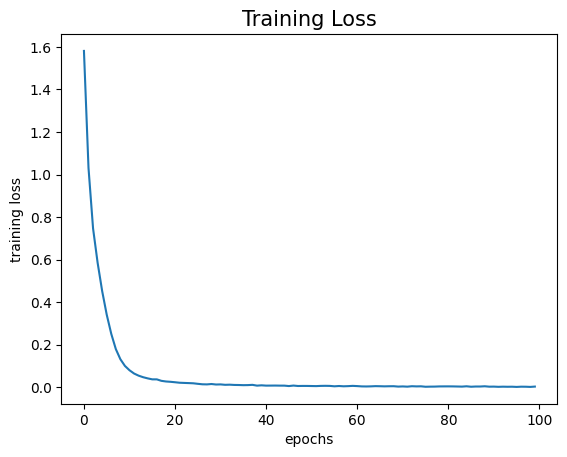

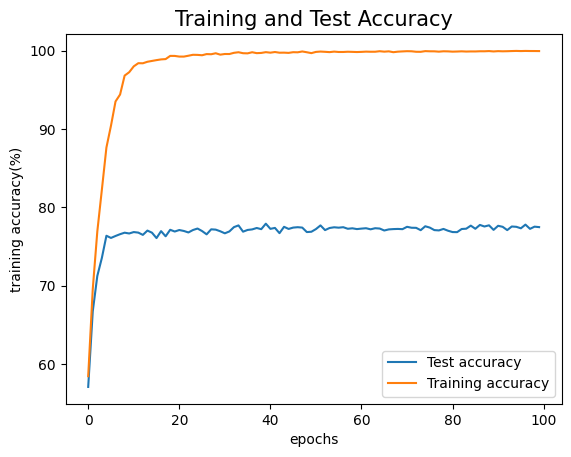

In [1]:
"""
Batch Size: 32
Beta 2: 0.99
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    net.train()
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar=np.arange(noe*batch_number)/batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=32
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1)

beta_1 = 0.0
beta_2 = 0.99

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
# net.eval()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finishegit d Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


NVIDIA GeForce RTX 3080 Ti
Memory Usage:
Allocated: 0.2 GB
Cached:    0.3 GB


C:\Users\Lexi\AppData\Local\Temp\ipykernel_33588\4043517238.py:163: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
Files already downloaded and verified


Using cache found in C:\Users\Lexi/.cache\torch\hub\pytorch_vision_v0.6.0


[1,    50] loss: 2.152, Ça coûte 7.232
[2,    50] loss: 1.221, Ça coûte 7.027
[3,    50] loss: 0.846, Ça coûte 7.087
[4,    50] loss: 0.636, Ça coûte 7.120
[5,    50] loss: 0.452, Ça coûte 7.186
[6,    50] loss: 0.296, Ça coûte 7.068
[7,    50] loss: 0.174, Ça coûte 7.183
[8,    50] loss: 0.095, Ça coûte 7.060
[9,    50] loss: 0.068, Ça coûte 7.162
[10,    50] loss: 0.045, Ça coûte 6.929
[11,    50] loss: 0.035, Ça coûte 7.001
[12,    50] loss: 0.040, Ça coûte 6.991
[13,    50] loss: 0.029, Ça coûte 6.913
[14,    50] loss: 0.024, Ça coûte 6.937
[15,    50] loss: 0.018, Ça coûte 6.974
[16,    50] loss: 0.029, Ça coûte 6.842
[17,    50] loss: 0.015, Ça coûte 6.976
[18,    50] loss: 0.030, Ça coûte 6.966
[19,    50] loss: 0.014, Ça coûte 6.970
[20,    50] loss: 0.017, Ça coûte 6.993
[21,    50] loss: 0.013, Ça coûte 7.015
[22,    50] loss: 0.015, Ça coûte 6.988
[23,    50] loss: 0.012, Ça coûte 6.998
[24,    50] loss: 0.011, Ça coûte 6.868
[25,    50] loss: 0.014, Ça coûte 6.937
[26,    5

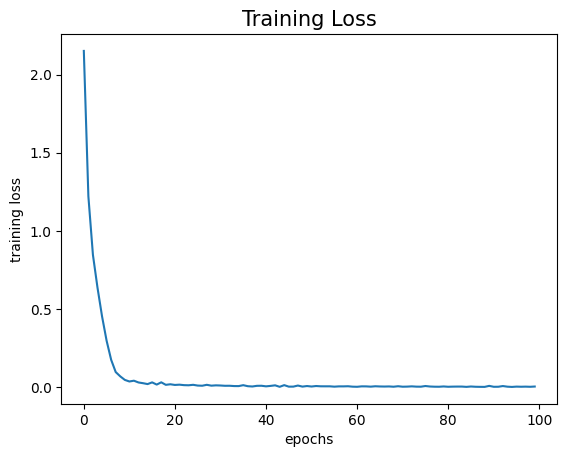

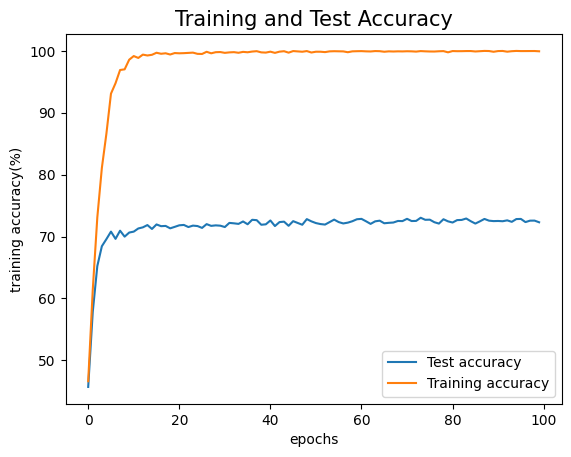

In [2]:
"""
Batch Size: 512
Beta 2: 0.99
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    net.train()
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=50
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar=np.arange(len(train_acc_vec))
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=512
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1)

beta_1 = 0.0
beta_2 = 0.99

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
# net.eval()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finishegit d Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
